In [1]:
# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Autoreload extension
%load_ext autoreload
%autoreload 2


In [2]:
from ecg_simulate import ecg_simulate


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Jordan Moshcovitis\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "c:\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 725, in start
    self.io_loop.start()
  File "c:\Python311\Lib\site-packages

AttributeError: _ARRAY_API not found

Simple plot

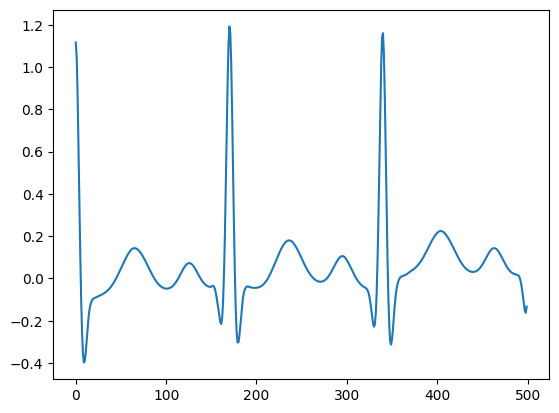

In [55]:

from matplotlib import pyplot as plt
ecg = ecg_simulate(duration=2, sampling_rate=250, heart_rate=90)

plt.plot(ecg)
plt.show()



Direct Parameters:
    - duration: Recording length in seconds.
    - length: Desired number of samples (if None, computed as duration * sampling_rate).
    - sampling_rate: Sampling frequency in Hz.
    - noise: Amplitude of the Laplace noise added to the signal.
    - heart_rate: Simulated heart rate in beats per minute (BPM).
    - heart_rate_std: Standard deviation of heart rate (BPM).
    - method: For backwards compatibility (simulation always uses ECGSYN).
    - random_state: Seed/state for reproducibility.
    - random_state_distort: Random state for signal distortion noise.

Additional Keyword Arguments (kwargs) for _ecg_simulate_ecgsyn:
    - lfhfratio: Low-frequency to high-frequency ratio for heart rate variability.
    - sfint: Internal sampling frequency used for accurate wave morphology.
           *Note:* Although its default is 512, in ecg_simulate it is overridden to the value of sampling_rate.
    - ti: Tuple of angular positions (in degrees) for the P, Q, R, S, and T waves.
    - ai: Tuple of amplitudes for the PQRST waves.
    - bi: Tuple of Gaussian width parameters for the PQRST waves.

Note:
    - The 'gamma' parameter (which influences lead scaling) is explicitly set inside ecg_simulate to np.ones(5)
      and should not be passed via kwargs.
    - Parameters like 'sfecg', 'N', 'hrmean', 'hrstd', and 'rng' are derived from the direct parameters and are
      managed internally.
"""


In [ ]:
params = {
    # Direct ecg_simulate parameters
    "duration": 2,                 # Recording length (seconds)
    "length": None,                 # Number of samples; if None, calculated as duration * sampling_rate
    "sampling_rate": 250,          # Sampling frequency in Hz
    "noise": 0.05,                  # Amplitude of Laplace noise
    "heart_rate": 70,               # Heart rate (BPM)
    "heart_rate_std": 1,            # Standard deviation of heart rate (BPM)

    # Additional kwargs for _ecg_simulate_ecgsyn
    "lfhfratio": 0.5,               # Low-frequency to high-frequency ratio for heart rate variability
    "ti": (-85, -15, 0, 15, 125),    # Angular positions (degrees) for the P, Q, R, S, and T waves
    "ai": (0.39, -5, 30, -7.5, 0.30),# Amplitudes of the PQRST waves
    "bi": (0.29, 0.1, 0.1, 0.1, 0.44),# Gaussian width parameters for the PQRST waves
    
    # Note: 'gamma' is explicitly set by ecg_simulate to np.ones(5) and should not be overridden.
}

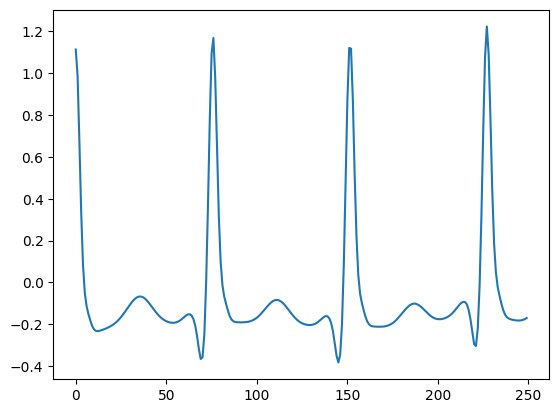

In [60]:

params = {
    # Direct ecg_simulate parameters
    "duration": 1,                 # Recording length (seconds)
    "length": None,                 # Number of samples; if None, calculated as duration * sampling_rate
    "sampling_rate": 250,          # Sampling frequency in Hz
    "noise": 0.06,                  # Amplitude of Laplace noise
    "heart_rate": 200,               # Heart rate (BPM)
    "heart_rate_std": 1,            # Standard deviation of heart rate (BPM)

    # Additional kwargs for _ecg_simulate_ecgsyn
    "lfhfratio": 0.5,               # Low-frequency to high-frequency ratio for heart rate variability
    "ti": (0.55*-85, -15, 0, 15, 125),    # Angular positions (degrees) for the P, Q, R, S, and T waves
    "ai": (0.39, -5, 30, -0.3*-7.5, 0.30),# Amplitudes of the PQRST waves
    "bi": (0.5*0.29, 0.1, 0.1, 0.1, 0.7*0.44),# Gaussian width parameters for the PQRST waves
    
    # Note: 'gamma' is explicitly set by ecg_simulate to np.ones(5) and should not be overridden.
}

ecg = ecg_simulate(**params)

plt.plot(ecg)
plt.show()

Use this to generate samples and test eth apply_state_to_params


base_p before: {'duration': 4, 'length': None, 'sampling_rate': 250, 'noise': 0.05, 'heart_rate': 70, 'heart_rate_std': 1, 'lfhfratio': 0.5, 'ti': (-85, -15, 0, 15, 125), 'ai': (0.39, -5, 30, -7.5, 0.3), 'bi': (0.29, 0.1, 0.1, 0.1, 0.44)}
params after: {'duration': 4, 'length': None, 'sampling_rate': 250, 'noise': 0.05, 'heart_rate': 71.9, 'heart_rate_std': 1.0, 'lfhfratio': 0.5, 'ti': (-85, -15, 0, 15, 125), 'ai': (0.39, -5, 30, -7.5, 0.3), 'bi': (0.29, 0.1, 0.1, 0.1, 0.44)}
base_p before: {'duration': 4, 'length': None, 'sampling_rate': 250, 'noise': 0.05, 'heart_rate': 70, 'heart_rate_std': 1, 'lfhfratio': 0.5, 'ti': (-85, -15, 0, 15, 125), 'ai': (0.39, -5, 30, -7.5, 0.3), 'bi': (0.29, 0.1, 0.1, 0.1, 0.44)}
params after: {'duration': 4, 'length': None, 'sampling_rate': 250, 'noise': 0.05, 'heart_rate': 123.3, 'heart_rate_std': 1.0, 'lfhfratio': 0.4, 'ti': (-85, -15, 0, 15, 128.0), 'ai': (0.39, -5, 27.0, -7.5, -0.24), 'bi': (0.29, 0.1, 0.1, 0.1, 0.44)}
base_p before: {'duration': 4, 

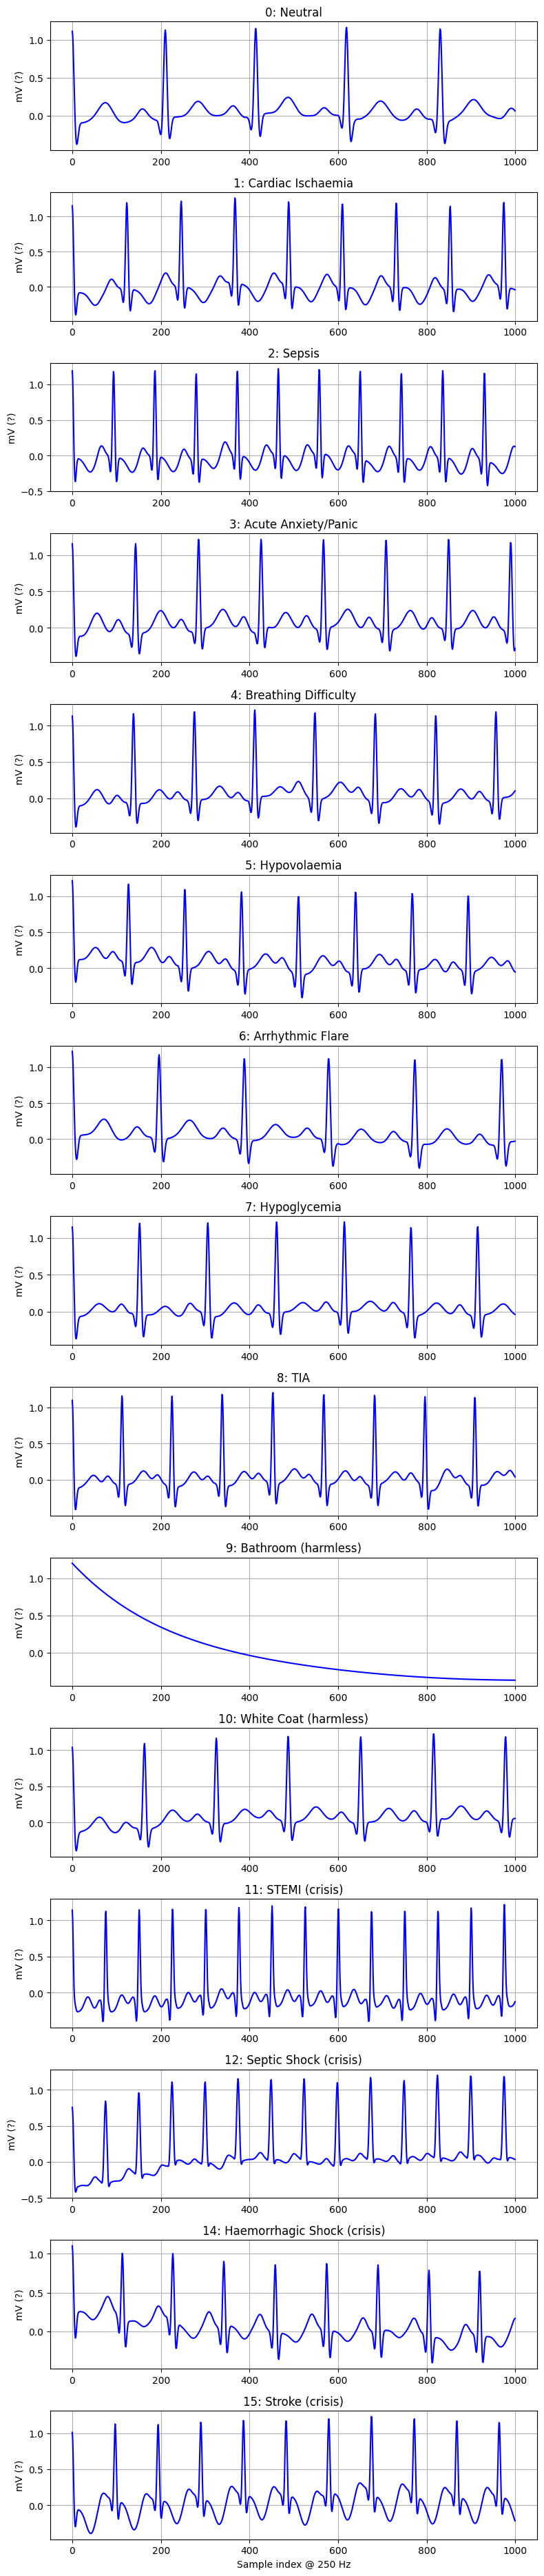

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Suppose these come from your "generate_ecg_from_vitals" script
from generate_ecg_from_vitals import (
    ecg_simulate,
    create_ecg_params_from_vitals
)

# Simple mapping from numeric label to name
STATE_LABELS = {
    0:  "Neutral",
    1:  "Cardiac Ischaemia",
    2:  "Sepsis",
    3:  "Acute Anxiety/Panic",
    4:  "Breathing Difficulty",
    5:  "Hypovolaemia",
    6:  "Arrhythmic Flare",
    7:  "Hypoglycemia",
    8:  "TIA",
    9:  "Bathroom (harmless)",
    10: "White Coat (harmless)",
    11: "STEMI (crisis)",
    12: "Septic Shock (crisis)",
    13: "Compromised Airway (crisis)",
    14: "Haemorrhagic Shock (crisis)",
    15: "Stroke (crisis)",
    16: "Death"
}

def base_ecg_params():
    """
    Baseline normal sinus. You can tweak here as well.
    """
    return {
        "duration": 4,        # short snippet (4s)
        "length": None,
        "sampling_rate": 250,
        "noise": 0.05,
        "heart_rate": 70,
        "heart_rate_std": 1,
        "lfhfratio": 0.5,
        "ti": (-85, -15, 0, 15, 125),
        "ai": (0.39, -5, 30, -7.5, 0.30),
        "bi": (0.29, 0.1, 0.1, 0.1, 0.44),
    }

def create_ecg_params_from_vitals_single_row(row, base_params):
    """
    Wraps create_ecg_params_from_vitals for a single row.
    This function:
      1) Builds a one-row DataFrame for create_ecg_params_from_vitals.
      2) Extracts the state_label.
      3) Applies any default if vital is missing/NaN.
    """
    row = row.copy()
    defaults = {
        "heart_rate": 70,
        "diastolic_bp": 80,
        "systolic_bp": 120,
        "respiratory_rate": 16,
        "oxygen_saturation": 98
    }
    for col, val in defaults.items():
        if col not in row or pd.isna(row[col]) or row[col] < 0:
            row[col] = val

    # Create a single-row DataFrame
    df_row = pd.DataFrame([row])
    state_label = int(row["state_label"]) if "state_label" in row else 0
    
    return create_ecg_params_from_vitals(df_row, base_params, state_label)

from typing import Optional, List

def test_ecg_states_simplified(vitals_csv: str = "vitals.csv", selected_states: Optional[List[int]] = None) -> None:
    """
    1. Load the CSV file containing vitals.
    2. For each state in `selected_states` (or all states 0..15 by default), pick one row.
    3. Generate a short snippet of ECG for each using simulation parameters derived from the vitals.
    4. Plot all resulting ECG snippets in a vertical figure.
    
    Parameters:
      vitals_csv : str
          Path to the CSV file with vitals data.
      selected_states : Optional[List[int]]
          List of state labels to process (provided as numbers).
          If not provided, the function will use all available states in the range 0 to 15.
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    
    # Load and filter the CSV data; skip state 'Death' (16)
    df = pd.read_csv(vitals_csv)
    df = df[df["state_label"] != 16].copy()
    
    # Sort to ensure stable picking
    df.sort_values(by=["patient_id", "timestamp"], inplace=True)
    
    # Determine the states to show based on user input or defaults (0 to 15)
    if selected_states is None:
        states_available = sorted(df["state_label"].unique())
        selected_states = [st for st in states_available if 0 <= st <= 15]
    
    # For each specified state, pick 1 random row and simulate the ECG signal
    ecg_snippets = []
    base_p = base_ecg_params()
    for st_label in selected_states:
        sub = df[df["state_label"] == st_label]
        if sub.empty:
            continue
        pick = sub.sample(n=1, random_state=42)
        row = pick.iloc[0]
        print(f"base_p before: {base_p}")
        # Build ECG parameters for this row
        params = create_ecg_params_from_vitals_single_row(row, base_p)
        print(f"params after: {params}")
        # Simulate the ECG wave
        wave = ecg_simulate(**params)
        
        label_str = f"{st_label}: {STATE_LABELS.get(st_label, 'unknown')}"
        ecg_snippets.append((label_str, wave))
    
    # Plot all ECG snippets using one vertical figure
    n = len(ecg_snippets)
    fig, axes = plt.subplots(n, 1, figsize=(8, 2.5 * n), sharex=False)
    if n == 1:
        axes = [axes]  # Ensure axes is iterable when only one plot exists
    
    for i, (lbl, wave) in enumerate(ecg_snippets):
        ax = axes[i]
        ax.plot(wave, color="b", lw=1.5)
        ax.set_title(lbl)
        ax.set_ylabel("mV (?)")
        ax.grid(True)
    
    axes[-1].set_xlabel("Sample index @ 250 Hz")
    plt.tight_layout()
    plt.show()

# Example usage:
# To plot only states 1, 3, and 5:
test_ecg_states_simplified("vitals.csv")


Wrote synthetic 'vitals.csv' with 24 rows across 4 states.
ECG data saved to ecg_data.csv


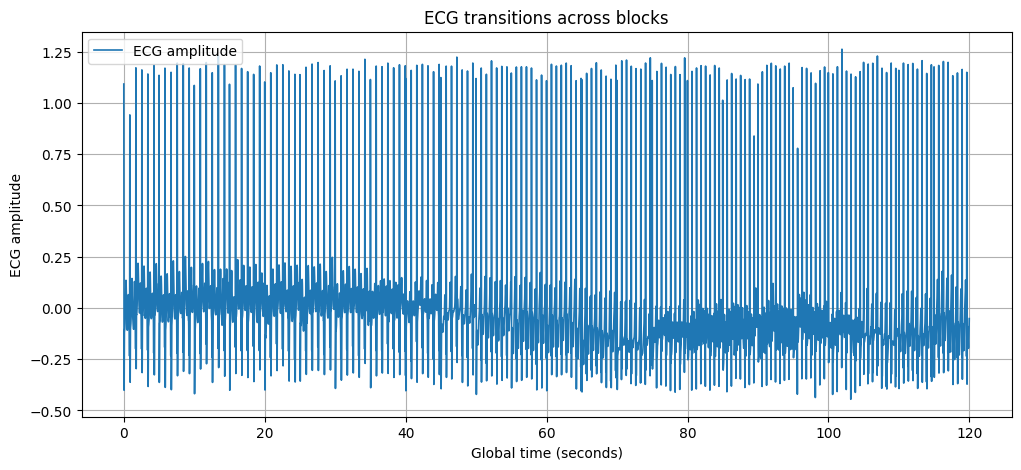

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta

# 1) We'll import the post-processing from your script
#    If your script is named `generate_ecg_from_vitals.py`,
#    ensure it's in the same directory or on the Python path.
from generate_ecg_from_vitals import generate_ecg_postprocess

def test_ecg_transition_demo(output_vitals="vitals.csv",
                             output_ecg="ecg_data.csv"):
    """
    1) Create a small synthetic DataFrame with multiple states in sequence,
       each lasting some rows. For example:
         Block A: 6 rows of state=0 (Neutral)
         Block B: 6 rows of state=1 (Cardiac Ischaemia)
         Block C: 6 rows of state=11 (STEMI)
         Block D: 6 rows of state=2 (Sepsis)
       
       Each row is 5 seconds apart in timestamp.
    2) Write it to 'vitals.csv'.
    3) Call generate_ecg_postprocess(...) to create 'ecg_data.csv'.
    4) Load ecg_data.csv and plot the entire wave to see transitions.
    """

    # Define a small sequence of states to showcase transitions
    # (You can edit these or the number of rows per state.)
    states_seq = [0, 1, 11, 2]  # Neutral → Ischaemia → STEMI → Sepsis
    rows_per_state = 6         # each state will last 6 rows (6×5 = 30 seconds)

    # Synthetic vitals for each state (just placeholders).
    # You can tune these to see different morphological results.
    # E.g. higher HR for ischaemia and STEMI, etc.
    state_to_vitals = {
        0:  {"diastolic_bp": 80,  "systolic_bp": 120, "heart_rate": 70, "respiratory_rate": 16, "oxygen_saturation": 98},
        1:  {"diastolic_bp": 85,  "systolic_bp": 125, "heart_rate": 85, "respiratory_rate": 18, "oxygen_saturation": 97},
        11: {"diastolic_bp": 90,  "systolic_bp": 140, "heart_rate": 95, "respiratory_rate": 20, "oxygen_saturation": 95},
        2:  {"diastolic_bp": 75,  "systolic_bp": 110, "heart_rate": 90, "respiratory_rate": 19, "oxygen_saturation": 96},
    }

    # Construct a DataFrame row by row
    all_rows = []
    base_time = datetime(2025, 1, 1, 12, 0, 0)
    block_id = 0
    for st in states_seq:
        block_id += 1
        vitals = state_to_vitals.get(st, state_to_vitals[0])  # fallback to neutral
        for r in range(rows_per_state):
            row_time = base_time + timedelta(seconds=5 * len(all_rows))
            all_rows.append({
                "timestamp": row_time.isoformat(),
                "patient_id": "DEMO_PATIENT",
                "diastolic_bp":     vitals["diastolic_bp"],
                "systolic_bp":      vitals["systolic_bp"],
                "heart_rate":       vitals["heart_rate"],
                "respiratory_rate": vitals["respiratory_rate"],
                "oxygen_saturation":vitals["oxygen_saturation"],
                "state_label":      st
            })

    df = pd.DataFrame(all_rows)
    df.to_csv(output_vitals, index=False)
    print(f"Wrote synthetic 'vitals.csv' with {len(df)} rows across {len(states_seq)} states.")

    # 2) Call the existing post-process function
    generate_ecg_postprocess(output_vitals, output_ecg)

    # 3) Load the resulting ecg_data.csv and plot the entire wave
    df_ecg = pd.read_csv(output_ecg)
    # Each block has a time_in_block_sec from 0..(block_duration), so we create
    # a cumulative offset so we can plot the full wave in one timeline.

    # Step a: figure out how many seconds each block lasts
    #         We can group by (patient_id, block_id).
    #         Then offset each subsequent block’s time_in_block_sec by the sum
    #         of previous block durations.
    df_ecg.sort_values(["patient_id", "block_id", "time_in_block_sec"], inplace=True)

    # compute block durations
    block_durations = df_ecg.groupby(["patient_id","block_id"])["time_in_block_sec"].max().reset_index()
    block_durations.rename(columns={"time_in_block_sec":"block_max_sec"}, inplace=True)

    # Merge back so each row knows how long its block is
    df_merged = pd.merge(df_ecg, block_durations, on=["patient_id","block_id"], how="left")

    # We'll accumulate a "time_offset" for each block_id in ascending order
    # For a single patient only, it's straightforward; for multiple, do groupby.
    offsets = []
    current_offset = 0.0
    last_block_id = None
    for idx, row in df_merged.iterrows():
        b_id = row["block_id"]
        if last_block_id is None or b_id != last_block_id:
            # new block => add the previous block's max to current_offset
            if last_block_id is not None:
                # find that previous block’s max
                prev_block_max = block_durations.loc[
                    (block_durations["patient_id"] == row["patient_id"]) &
                    (block_durations["block_id"] == last_block_id),
                    "block_max_sec"
                ]
                if not prev_block_max.empty:
                    current_offset += float(prev_block_max.iloc[0])
            last_block_id = b_id
        offsets.append(current_offset)

    df_merged["cumulative_offset"] = offsets
    df_merged["global_time"] = df_merged["cumulative_offset"] + df_merged["time_in_block_sec"]

    # Now we can plot "global_time" vs "ecg_amplitude"
    plt.figure(figsize=(12,5))
    plt.plot(df_merged["global_time"], df_merged["ecg_amplitude"], label="ECG amplitude", lw=1.2)
    plt.xlabel("Global time (seconds)")
    plt.ylabel("ECG amplitude")
    plt.title("ECG transitions across blocks")
    plt.grid(True)
    plt.legend()
    plt.show()


# ------------
# Usage example in your notebook cell:
test_ecg_transition_demo("sample-vitals.csv", "ecg_data.csv")
